# Runs Batted In

It's baseball season again. As we enter the 2017 Postseason I thought it would be a appropriate to explore batting data and their impacts on the World Series winning team from the 2016 MLB season. The baseball statistic we'll focus on in this analysis is Runs Batted In. Runners Batted In or RBI is the gold standard in baseball statistics, directly impacting the ability to score runs. In players, RBI is useful in determining the skill level and utility, a contributing factor to team success. We'll compare this data among teams and individual players to see if we can gleam meaningful insights into their affects on the WS winning team. This analysis will seek to answer the following questions. With RBI's direct impact on the points scored in a game, can we expect the WS winning team to have a team RBI mean among the top 5 teams and include at least 1 player with an RBI count among the top 10 players?

Let's begin the analysis by importing the Teams.csv and Batting.csv files from http://www.seanlahman.com/baseball-archive/statistics/, and identify the team that won the world series in 2016.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

teams_df = pd.read_csv('Teams.csv') #Determine 2016 World Series winner with stats.
batting_df = pd.read_csv('Batting.csv') #Determine team and player RBI stats. 

plt.style.use('seaborn-colorblind')

In [2]:
teams_df[teams_df.yearID==2016].loc[teams_df.WSWin=='Y', :]
#Determine World Series Winner for year 2016.

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2810,2016,NL,CHN,CHC,C,1,162,81.0,103,58,...,116.0,0.983,Chicago Cubs,Wrigley Field,3232420.0,95,93,CHC,CHN,CHN


If you recall the MLB 2016 season, you'll remember that the Chicago Cubs had a memorable year in which they were the National League Central Champions, the National League Champions and the World Series Champions. Their first WS win since 1908. The result above shows team stats for the 2016 season. Now we'll calculate the average RBI count for each team so that we can identify the top 5 performing teams.

In [3]:
batting_df = batting_df[batting_df.yearID==2016].loc[:, 'playerID':'RBI']
#Remove data for years other than 2016 and columns after RBI.

In [4]:
batting_2016_df = batting_df[batting_df.yearID==2016].loc[batting_df.AB!=0, :]
#Remove players who did not go to bat during the 2016 regular season.
#batting_2016_df.head

teamID
ARI    19.694444
ATL    14.302326
BAL    23.666667
BOS    26.125000
CHA    21.161290
CHN    20.729730
CIN    16.536585
CLE    26.178571
COL    23.000000
DET    25.678571
HOU    25.518519
KCA    22.857143
LAA    22.866667
LAN    15.111111
MIA    15.650000
MIL    18.852941
MIN    22.258065
NYA    21.566667
NYN    17.540541
OAK    18.114286
PHI    15.944444
PIT    15.818182
SDN    14.863636
SEA    24.500000
SFN    19.285714
SLN    21.285714
TBA    21.566667
TEX    24.866667
TOR    26.000000
WAS    22.272727
Name: RBI, dtype: float64



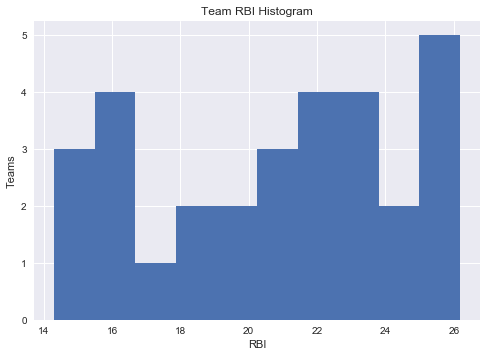

In [5]:
team_RBI_mean = batting_2016_df.groupby('teamID').RBI.mean()

print team_RBI_mean
print
sns.set()
_ = plt.hist(team_RBI_mean, bins=10)
 #Histogram of RBI averages for all teams Postseason teams. x=teamID, y=RBI

_ = plt.title("Team RBI Histogram")
_ = plt.xlabel("RBI")
_ = plt.ylabel("Teams")

plt.show()

We have calculated RBI averages for each team above, accounting for the removal of players with zero At Bats. This was acheived by locating column, At Bat within the dataframe and removing any value equal to zero. This allows for the exclusion of players who may have missed the regular season for any reason and were unable to appear for at least one at bat. In focusing our analysis this way we get a better representation of true RBI statistic. Averages were not inserted because the data shows the possible outcome for a player to have an RBI count of 0 despite having multiple ABs. AB and RBI are mutually inclusive events, without making an appearance at bat there is no chance to earn an RBI.

The histogram was created to show the distribution of RBI averages among teams, across 10 bins. From the results we can identify the Cubs ranked 18th among team RBI averages, well outside the range of the top 5 teams. More than half of MLB teams had RBI averages higher than the Cubs. Below we have code that will calculate various stats for league RBI averages for additional perspective. 

In [6]:
batting_2016_df.RBI.describe()

count    1023.000000
mean       20.278592
std        28.455713
min         0.000000
25%         0.000000
50%         5.000000
75%        31.000000
max       133.000000
Name: RBI, dtype: float64

We can see from these result that the league RBI average is slightly lower than the RBI average for the Cubs, which shows that a team doesn't need to have a high team RBI average in order to win a WS. Sometimes average RBI performance can still get you the Commissioner's Trophy. Now we'll explore player RBI data, sorting for RBI counts and listing the results from highest to lowest. This will allow us visibility into which players rank in the top 10.

In [7]:
RBI_2016_df = batting_df[batting_df.yearID==2016].loc[:, 'playerID':'RBI']
#What is this doing here?

In [8]:
player_rbi_df = batting_2016_df.sort_values('RBI', ascending=False)

print player_rbi_df.head

<bound method DataFrame.head of          playerID  yearID  stint teamID lgID    G   AB    R    H  2B  3B  HR  \
101384  arenano01    2016      1    COL   NL  160  618  116  182  35   6  41   
102307  ortizda01    2016      1    BOS   AL  151  537   79  169  48   1  38   
101717  encared01    2016      1    TOR   AL  160  601   99  158  34   0  42   
102405  pujolal01    2016      1    LAA   AL  152  593   71  159  19   0  31   
101441  bettsmo01    2016      1    BOS   AL  158  672  122  214  42   5  31   
102417  ramirha01    2016      1    BOS   AL  147  549   81  157  28   1  30   
102467  rizzoan01    2016      1    CHN   NL  155  583   94  170  43   4  32   
101513  cabremi01    2016      1    DET   AL  158  595   92  188  31   1  38   
102698  trumbma01    2016      1    BAL   AL  159  613   94  157  27   1  47   
101620   cruzne02    2016      1    SEA   AL  155  589   96  169  27   1  43   
101429  beltrad01    2016      1    TEX   AL  153  583   89  175  31   1  32   
101953  

In [9]:
player_rbi_df.loc[player_rbi_df.playerID=='rizzoan01', :]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI
102467,rizzoan01,2016,1,CHN,NL,155,583,94,170,43,4,32,109.0


From the results above we can see that only one Cubs player made the cut for the top 10 players with the highest RBI count, Anthony Rizzo ranked 7th. We can conclude that for the 2016 WS, we should expect at least one player from the top 10 list to play for the WS winning team. If we expand the scope and look at the top 20 players we will see another Cubs player make the list, Kris Bryant ranked 17th.

Finally let's explore some interesting graphs detailing how player RBI data compares with other important statistics, including, At Bats and Home Runs. Some interesting comparisons worth noting from these results include how RBI and AB correlate with each other; the more AB a player has the stronger the likelihood a player will have a higher RBI value. Another point of interest is how many RBIs are the result of a Home Run. Again we should note the positive correlation between these two stats, when a player has a higher HR score they also tend to have a higher RBI count. A direct causation is not verifiable given this type of analysis.

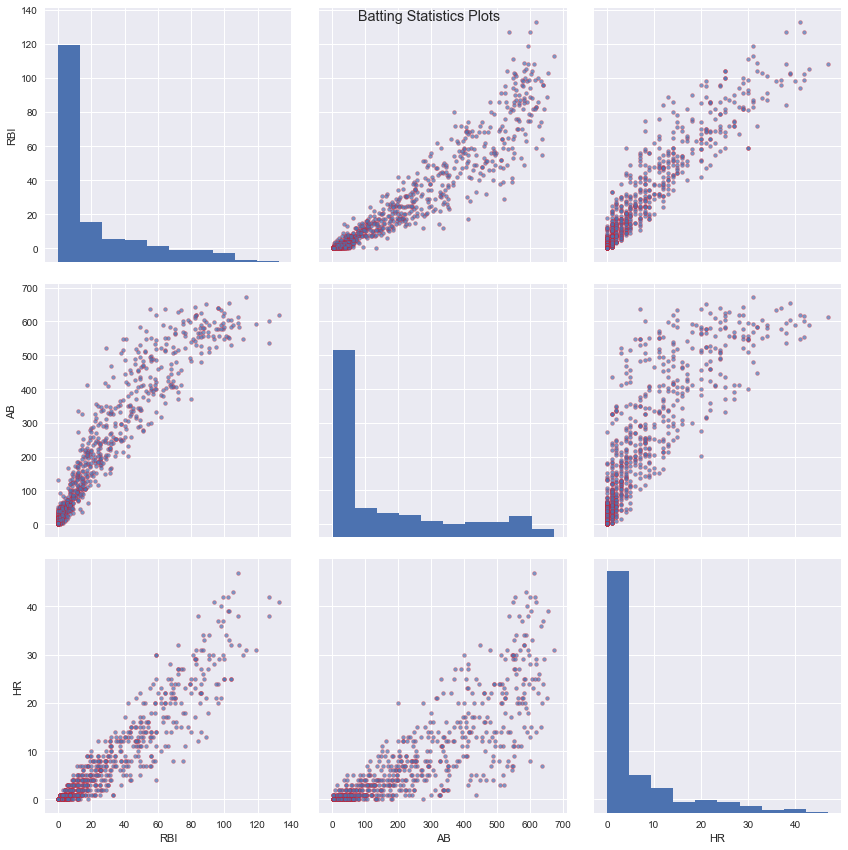

In [10]:
sns.pairplot(batting_2016_df[['RBI', 'AB', 'HR']], 
                 size=4, plot_kws={'s':15,'edgecolor':'red','alpha':0.7})
plt.suptitle("Batting Statistics Plots")
plt.show()

This dataset analysis includes two limitations, which should not impare their use in this study. The first limitation we should consider is players who were unable to earn RBI because they didn't appear at bat during the regular season. Including players with zero AB in this analysis would skew the team and league averages lower when calculating for the mean. The second includes a limitation on the number of years used in this analysis. We have chosen to focus on the WS winning team for the 2016 season, but additional analysis should be performed including calculations for additional years in order to fully understand the impact of RBI on World Series winning teams. We might also want to consider expanding this analysis to include other batting data statistics in order to shed light on how they affect the WS winning team.

From this analysis we can conclude that for the 2016 regular season, we did not see the WS winning team rank among the top 5 teams for average RBI. We can identify however, that at least 1 player for the Cubs appeared on the top 10 list of players with the highest RBI counts. In this investigation we can see that RBI may not always play a significant role in determining a team's chances of winning the World Series. 

An additional story to help reinforce this hypothesis lies in the RBI stats for the Boston Red Sox. They had the most players in the top 10 list, a total of 3, and they ranked 2nd on the list of team RBI averages. Despite the high marks, they weren't able to make it past the American League Division Series (as noted on https://en.wikipedia.org/wiki/2016_Major_League_Baseball_season). With their RBI performance numbers we should have expected them to get further into the postseason. Perhaps the correlation between a high RBI rating and winning the WS is not as strong as we initially considered.